# Simulated data for DiD specifications

This notebook describes my data simulation code for *difference-in-differences* specifications.

See [did repo](https://github.com/vvoutilainen/Data_Science_Projects/tree/master/stats/did) for updated notebooks and source code.

## Notation

Assume we are measuring observations for individuals (e.g., firms) over time points $t = 0, 1, \cdots \bar{t}$. We may either have a) repeated observations for same individuals (*panel* data) or b) new observations for (possibly) different individuals (*repeated cross section* data). There are two distinguished groups of individuals ($j=C,T$), for example, from two different areas, with 300 ($i=0, \dots , N$) individuals in each group.

We imagine a one-off, unanticipated *policy intervention* (e.g., a government stimulus package) that affects some feature of interest of individuals in group $j=T$ and leaves individuals in $j=C$ unaffected. The intervention takes place between time points $t^{*}$ and $t^{*}+1$, where $0 < t^{*} < \bar{t}$. We are interested in the **treatment effect** of the intervention on the feature of interest.

 - Let $Y_{ijt}$ denote the feature of interest (or "outcome") for individual $i$ from group $j$ at time $t$. That is, we let the feature of interest be dependent on i) individual idiosyncrasies, b) treatment group $j$ as well as time $t$.
 - Let $D=0,1$ denote the treatment status (untreated, treated) of individual.  
 - Let $Y_{ijt}^d$ denote the potential outcome at time $t$ under treatment $D=d$.

## Data generating process

We follow [Zeldow & Hatfield (2021)](https://onlinelibrary.wiley.com/doi/10.1111/1475-6773.13666) (eq. 4) and propose a similar (but not quite equal) data generating process (DGP) for the untreated potential outcomes of individuals:

$$
\begin{equation*}
    Y_{ijt}^0 = \gamma_j + \xi_t + \lambda_t X_{ijt} + \epsilon_{it}
\end{equation*}
$$

where

 - $\gamma_j$ is a group-specific time-invariant effect;
 - $\xi_t$ is a time-specific effect (affecting all individuals/groups in the same way);
 - $X_{ijt}$ is a individual-group-time specific effect. $\lambda_t$ denotes the time-varying effect of $X_{ijt}$. Notice that $\lambda_t$ does is not allowed to vary across groups $j$;
 - $\epsilon_{it}$ denote individual-and-time specific idiosyncrasies.

Effect of intervention is modelled as an additive effect. The DGP for treated potential individual outcomes is

$$
\begin{equation*}
    Y_{ijt}^1 = Y_{ijt}^0 + \tau
\end{equation*}
$$

where $\tau$ is the treatment effect (constant for all individuals). Due to our non-anticipation assumption, treatment does not affect the treatment group in pre-period. Hence, the observed outcome can be written as

$$
\begin{equation*}
    Y_{ijt} = D_{it} Y_{ijt}^1 + (1-D_{it}) Y_{ijt}^0
\end{equation*}
$$

We allow for the following specification of above defined effects:

 - $\epsilon_{it} \sim N(0, \sigma^2_e)$
 - $\gamma_j$: constant;
 - $\xi_t$: $f_{\xi}(t)$, i.e., a flexible equation having $t$ as argument;
 - $\lambda_t X_{ijt}$: Different specifications: 
   - (X1): Time-invariant covariate, time-invariant covariate effect: $\lambda_t X_{ijt} = X_{ij} \sim N(\mu_j, \sigma_j^2)$ for all $t$. That is, the term affects the outcome in individual-and-group specific (time-invariant) way. Notice that the covariate is a confounder in cross-section dimension only if $\mu_C \neq \mu_T$. If $\mu_C = \mu_T$, then (average) overlap of $X_{ij}$ between groups is the same and we have that the term affects the outcome in individual specific (treatment-and-time-invariant) way only (if variances differ between groups, it might affect efficiency, however);
   - (X5a): Time-variant covariate (divergent evolution), time-invariant covariate effect: $\lambda_t X_{ijt} = X_{ij} +  \alpha_j t $ where $X_{ij} \sim N(\mu_j, \sigma_j^2)$. The covariates between groups $j$ have a divergent evolution as long as $\alpha_T \neq \alpha_C$. Covariate may or may not be a confounder in cross-section (depending on whether $\mu_C = \mu_T$ or not), but this does not matter. The main point is that the evolution of the covariate between groups differs.
   - **Rest from Appendix D of [Zeldow & Hatfield (2021)](https://onlinelibrary.wiley.com/doi/10.1111/1475-6773.13666) to be filled**.
   
Note some differences compared to [Zeldow & Hatfield (2021)](https://onlinelibrary.wiley.com/doi/10.1111/1475-6773.13666):

 - Our $\gamma_j$ corresponds to their $\alpha_0 + \alpha_1 di$ in the following way: $\gamma_C = \alpha_0$ and $\gamma_T = \alpha_0 + \alpha_1$;
 - Their specification lets $X$ be dependent on individual *i*'s past history (scenarios 4-6, assuming panel data). In our DGP time-varying $X$ is not allowed to have such property (at least yet) as the DGPs for panel and repeated cross-sections are basically the same.

Our DGP does not currently allow for:

 - Varying effect across treatment groups for the covariate, i.e., $\lambda_t^j$. This might be an interesting addition that is not supported in [Zeldow & Hatfield (2021)](https://onlinelibrary.wiley.com/doi/10.1111/1475-6773.13666).
 - Staggered treatment. For this, see, for example, [did](https://github.com/bcallaway11/did) R package by Brantly Callaway and Pedro H.C. Sant’Anna.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
np.random.seed(1)
import pandas as pd
import matplotlib.pyplot as plt
import rpy2
%load_ext rpy2.ipython
from did_helpers import(
    simulate_did_data,
    plot_repcrossec_data,
    plot_panel_data,
)

## Panel data

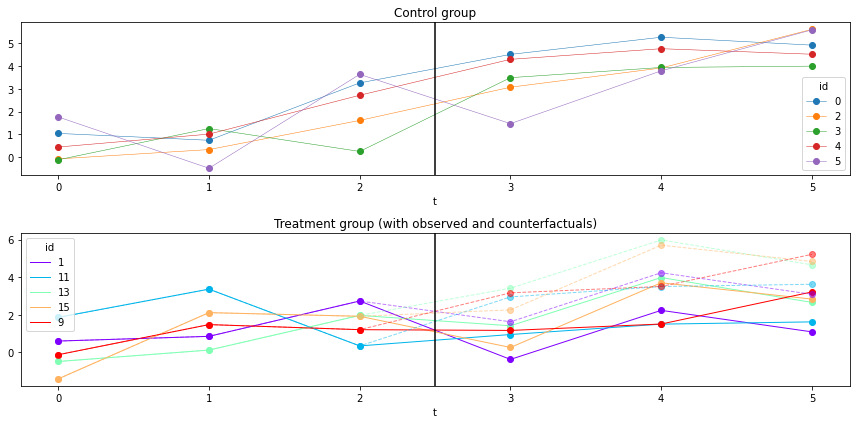

In [2]:
out_panel = simulate_did_data(param_datasettype="panel")
plot_panel_data(
    out_panel,
    selected_individuals=\
        out_panel["observed"].query("treatment_group=='control'")["id"].head(5).tolist() + \
        out_panel["observed"].query("treatment_group=='treatment'")["id"].head(5).tolist()
)

## Repeated cross-section data

Realized control pre-period mean 1.038
Realized control post-period mean 4.028
Realized treated pre-period mean 0.966
Realized treated post-period mean 1.951
Counterfactual (unobserved) treatment post-period mean 3.951
Counterfactual (naively estimated) treated post-period mean 3.956
Naive DiD-estimate -2.004


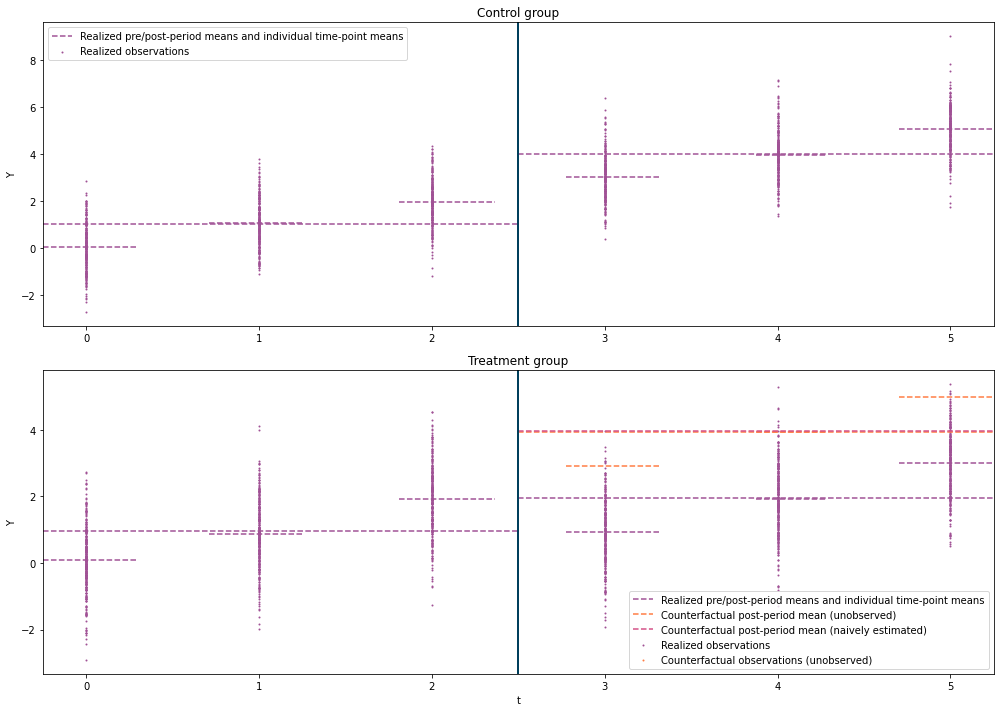

In [3]:
out_rpc = simulate_did_data(param_datasettype="repeated cross-section")
plot_repcrossec_data(out_rpc)